<a href="https://colab.research.google.com/github/Jinti123/Dysarthric-Speech-to-Text/blob/main/Dysarthria_Speech_to_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets

import os
import re
import shutil
import pandas as pd
from datasets import load_dataset
from tqdm import tqdm
import soundfile as sf

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load TORGO dataset
dataset = load_dataset("abnerh/TORGO-database", split="train")

# Take 50% of the dataset
half_dataset = dataset.select(range(len(dataset) // 2))

# Define target Drive folder for audio
drive_audio_folder = "/content/drive/MyDrive/TORGO_50_percent_audio"
os.makedirs(drive_audio_folder, exist_ok=True)

# Normalize function
def normalize(text):
    return re.sub(r'[^\w\s]', '', text.lower())

# Prepare CSV data
csv_data = []

for i, sample in tqdm(enumerate(half_dataset), total=len(half_dataset)):
    filename = f"{i:04d}.wav"
    transcription = sample["transcription"]
    normalized = normalize(transcription)
    audio_data = sample["audio"]["array"]
    sample_rate = sample["audio"]["sampling_rate"]

    # Save audio to Drive
    target_path = os.path.join(drive_audio_folder, filename)
    sf.write(target_path, audio_data, sample_rate)

    # Save CSV info
    csv_data.append({
        "Id": filename,
        "transcription": transcription,
        "normalized_transcription": normalized
    })

# Save CSV in Colab
csv_path = "/content/audio_transcriptions_half.csv"
pd.DataFrame(csv_data).to_csv(csv_path, index=False)

print(f"\n✅ CSV saved at: {csv_path}")
print(f"✅ Audio files saved at: {drive_audio_folder}")




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

MessageError: Error: credential propagation was unsuccessful

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from datasets import load_dataset
import shutil

# Load dataset
dataset = load_dataset("abnerh/TORGO-database", split="train")

# Target folder in Google Drive
drive_audio_folder = "/content/drive/MyDrive/TORGO_Audio"

# Create the folder if it doesn't exist
os.makedirs(drive_audio_folder, exist_ok=True)

# Copy audio files to Google Drive
for example in dataset:
    audio_path = example['audio']['path']
    filename = os.path.basename(audio_path)
    target_path = os.path.join(drive_audio_folder, filename)
    shutil.copy(audio_path, target_path)

print(f"✅ All audio files copied to: {drive_audio_folder}")


FileNotFoundError: [Errno 2] No such file or directory: 'FC01_1_arrayMic_0066.wav'

In [ ]:
from datasets import load_dataset
import os
import soundfile as sf  # for writing wav files
from google.colab import drive

# Step 1: Mount Drive
drive.mount('/content/drive')

# Step 2: Install necessary packages
!pip install datasets
!pip install soundfile

# Step 3: Load the dataset
dataset = load_dataset("abnerh/TORGO-database", split="train")

# Step 4: Create folder in Drive
output_folder = "/content/drive/MyDrive/TORGO_Audio"
os.makedirs(output_folder, exist_ok=True)

# Step 5: Save audio files
for i, sample in enumerate(dataset):
    audio_array = sample['audio']['array']
    sampling_rate = sample['audio']['sampling_rate']
    filename = f"{i:04d}.wav"
    filepath = os.path.join(output_folder, filename)

    # Write audio to .wav file
    sf.write(filepath, audio_array, sampling_rate)

print(f"✅ Saved {len(dataset)} audio files to {output_folder}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Saved 16552 audio files to /content/drive/MyDrive/TORGO_Audio


In [ ]:
import pandas as pd
import re
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("abnerh/TORGO-database", split="train")

# Function to normalize transcription
def normalize(text):
    return re.sub(r'[^\w\s]', '', text.lower())

# Prepare CSV rows
csv_data = []

for i, sample in enumerate(dataset):
    filename = f"{i:04d}.wav"
    original = sample['transcription']
    normalized = normalize(original)

    csv_data.append({
        "Id": filename,
        "transcription": original,
        "normalized_transcription": normalized
    })

# Save CSV in Colab local file system
csv_path = "/content/audio_transcriptions.csv"
df = pd.DataFrame(csv_data)
df.to_csv(csv_path, index=False)

print(f"✅ CSV saved to: {csv_path}")


✅ CSV saved to: /content/audio_transcriptions.csv


In [2]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 63.8 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from IPython import display
from jiwer import wer

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Path to your CSV file in Google Drive
csv_path = "/content/audio_transcriptions_half (2).csv"

# Path to the directory containing your .wav files in Google Drive
wavs_path = "/content/drive/MyDrive/TORGO_50_percent_audio/"

In [8]:
import pandas as pd

# Load the CSV file
metadata_df = pd.read_csv(csv_path)

# Rename columns to match the expected format
metadata_df.columns = ["file_name", "transcription", "normalized_transcription"]

# Remove .WAV from the file names
metadata_df["file_name"] = metadata_df["file_name"].str.replace(".wav", "", regex=False)

# Use only the necessary columns
metadata_df = metadata_df[["file_name", "normalized_transcription"]]

# Shuffle the dataset
metadata_df = metadata_df.sample(frac=1).reset_index(drop=True)

# Display the first few rows
print(metadata_df.head())

  file_name                   normalized_transcription
0      5980                                     threat
1      0769  she suggested we all have dinner together
2      3386            the snow blew into large drifts
3      2297                                       book
4      4014                                       dark


In [10]:
split = int(len(metadata_df) * 0.60)
df_train = metadata_df[:split]
df_val = metadata_df[split:]

print(f"Size of the training set: {len(df_train)}")
print(f"Size of the validation set: {len(df_val)}")

Size of the training set: 4965
Size of the validation set: 3311


In [11]:
print(metadata_df.head())  # Check the first few rows of your metadata
print(df_train.head())     # Check the training data
print(df_val.head())       # Check the validation data

  file_name                   normalized_transcription
0      5980                                     threat
1      0769  she suggested we all have dinner together
2      3386            the snow blew into large drifts
3      2297                                       book
4      4014                                       dark
  file_name                   normalized_transcription
0      5980                                     threat
1      0769  she suggested we all have dinner together
2      3386            the snow blew into large drifts
3      2297                                       book
4      4014                                       dark
     file_name  normalized_transcription
4965      5996                      best
4966      7195                      rich
4967      6872                       bad
4968      4368                      feet
4969      7702  range was a vital detail


In [12]:
frame_length = 256
frame_step = 160
fft_length = 384

In [13]:
import tensorflow as tf # Import TensorFlow

characters = [x for x in "abcdefghijklmnopqrstuvwxyz'?! "]
char_to_num = tf.keras.layers.StringLookup(vocabulary=characters, oov_token="") # Access using tf.keras
num_to_char = tf.keras.layers.StringLookup(vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True) # Access using tf.keras

print(f"The vocabulary is: {char_to_num.get_vocabulary()} and the inverse is: {num_to_char.get_vocabulary()}")

The vocabulary is: ['', np.str_('a'), np.str_('b'), np.str_('c'), np.str_('d'), np.str_('e'), np.str_('f'), np.str_('g'), np.str_('h'), np.str_('i'), np.str_('j'), np.str_('k'), np.str_('l'), np.str_('m'), np.str_('n'), np.str_('o'), np.str_('p'), np.str_('q'), np.str_('r'), np.str_('s'), np.str_('t'), np.str_('u'), np.str_('v'), np.str_('w'), np.str_('x'), np.str_('y'), np.str_('z'), np.str_("'"), np.str_('?'), np.str_('!'), np.str_(' ')] and the inverse is: ['', np.str_('a'), np.str_('b'), np.str_('c'), np.str_('d'), np.str_('e'), np.str_('f'), np.str_('g'), np.str_('h'), np.str_('i'), np.str_('j'), np.str_('k'), np.str_('l'), np.str_('m'), np.str_('n'), np.str_('o'), np.str_('p'), np.str_('q'), np.str_('r'), np.str_('s'), np.str_('t'), np.str_('u'), np.str_('v'), np.str_('w'), np.str_('x'), np.str_('y'), np.str_('z'), np.str_("'"), np.str_('?'), np.str_('!'), np.str_(' ')]


In [14]:
def encode_single_sample(wav_file, label):
    # Read the .wav file
    # wav_file = wav_file.replace(".WAV", "")
    file = tf.io.read_file(wavs_path + wav_file + ".wav")
    audio, _ = tf.audio.decode_wav(file)
    audio = tf.squeeze(audio, axis=-1)
    audio = tf.cast(audio, tf.float32)

    # Compute the spectrogram
    spectrogram = tf.signal.stft(audio, frame_length=frame_length, frame_step=frame_step, fft_length=fft_length)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.math.pow(spectrogram, 0.5)

    # Normalize the spectrogram
    means = tf.math.reduce_mean(spectrogram, 1, keepdims=True)
    stddevs = tf.math.reduce_std(spectrogram, 1, keepdims=True)
    spectrogram = (spectrogram - means) / (stddevs + 1e-10)

    # Process the label
    label = tf.strings.lower(label)
    label = tf.strings.unicode_split(label, input_encoding="UTF-8")
    label = char_to_num(label)

    return spectrogram, label

In [15]:
batch_size = 32

# Training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((list(df_train["file_name"]), list(df_train["normalized_transcription"])))
train_dataset = (
    train_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

# Validation dataset
validation_dataset = tf.data.Dataset.from_tensor_slices((list(df_val["file_name"]), list(df_val["normalized_transcription"])))
validation_dataset = (
    validation_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

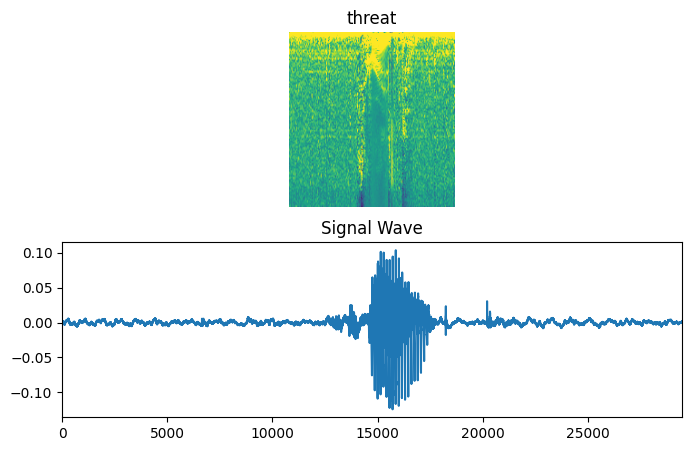

In [16]:
# Plot a sample from the dataset
fig = plt.figure(figsize=(8, 5))

# Take one batch from the training dataset
for batch in train_dataset.take(1):
    spectrogram = batch[0][0].numpy()
    spectrogram = np.array([np.trim_zeros(x) for x in np.transpose(spectrogram)])
    label = batch[1][0]
    label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")

    # Plot the spectrogram
    ax = plt.subplot(2, 1, 1)
    ax.imshow(spectrogram, vmax=1)
    ax.set_title(label)
    ax.axis("off")

    # Plot the waveform
    file = tf.io.read_file(wavs_path + list(df_train["file_name"])[0] + ".wav")
    audio, _ = tf.audio.decode_wav(file)
    audio = audio.numpy()
    ax = plt.subplot(2, 1, 2)
    plt.plot(audio)
    ax.set_title("Signal Wave")
    ax.set_xlim(0, len(audio))

    # Display the audio
    display.display(display.Audio(np.transpose(audio), rate=16000))
    plt.show()

In [17]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [18]:
def build_model(input_dim, output_dim, rnn_layers=5, rnn_units=128):
    input_spectrogram = layers.Input((None, input_dim), name="input")
    x = layers.Reshape((-1, input_dim, 1), name="expand_dim")(input_spectrogram)
    x = layers.Conv2D(filters=32, kernel_size=[11, 41], strides=[2, 2], padding="same", use_bias=False, name="conv_1")(x)
    x = layers.BatchNormalization(name="conv_1_bn")(x)
    x = layers.ReLU(name="conv_1_relu")(x)
    x = layers.Conv2D(filters=32, kernel_size=[11, 21], strides=[1, 2], padding="same", use_bias=False, name="conv_2")(x)
    x = layers.BatchNormalization(name="conv_2_bn")(x)
    x = layers.ReLU(name="conv_2_relu")(x)
    x = layers.Reshape((-1, x.shape[-2] * x.shape[-1]))(x)
    for i in range(1, rnn_layers + 1):
        recurrent = layers.GRU(
            units=rnn_units,
            activation="tanh",
            recurrent_activation="sigmoid",
            use_bias=True,
            return_sequences=True,
            reset_after=True,
            name=f"gru_{i}",
        )
        x = layers.Bidirectional(recurrent, name=f"bidirectional_{i}", merge_mode="concat")(x)
        if i < rnn_layers:
            x = layers.Dropout(rate=0.5)(x)
    x = layers.Dense(units=rnn_units * 2, name="dense_1")(x)
    x = layers.ReLU(name="dense_1_relu")(x)
    x = layers.Dropout(rate=0.5)(x)
    output = layers.Dense(units=output_dim + 1, activation="softmax")(x)
    model = keras.Model(input_spectrogram, output, name="DeepSpeech_2")
    opt = keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(optimizer=opt, loss=CTCLoss)
    return model

model = build_model(input_dim=fft_length // 2 + 1,
                    output_dim=char_to_num.vocabulary_size(),
                    rnn_units=512,
)
model.summary(line_length=110)


Model: "DeepSpeech_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                   ┃ Output Shape                        ┃             Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                             │ (None, None, 193)                   │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ expand_dim (Reshape)                           │ (None, None, 193, 1)                │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_1 (Conv2D)                                │ (None, None, 97, 32)                │              14,432 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_1_bn (BatchNormalization)                 │ (None, None, 97, 32)                │                 128 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_1_relu (ReLU)                             │ (None, None, 97, 32)                │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_2 (Conv2D)                                │ (None, None, 49, 32)                │             236,544 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_2_bn (BatchNormalization)                 │ (None, None, 49, 32)                │                 128 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_2_relu (ReLU)                             │ (None, None, 49, 32)                │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ reshape (Reshape)                              │ (None, None, 1568)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ bidirectional_1 (Bidirectional)                │ (None, None, 1024)                  │           6,395,904 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dropout (Dropout)                              │ (None, None, 1024)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ bidirectional_2 (Bidirectional)                │ (None, None, 1024)                  │           4,724,736 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dropout_1 (Dropout)                            │ (None, None, 1024)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ bidirectional_3 (Bidirectional)                │ (None, None, 1024)                  │           4,724,736 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dropout_2 (Dropout)                            │ (None, None, 1024)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ bidirectional_4 (Bidirectional)                │ (None, None, 1024)                  │           4,724,736 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dropout_3 (Dropout)                            │ (None, None, 1024)                  │                   0 │
├───

 Total params: 26,628,480 (101.58 MB)

 Trainable params: 26,628,352 (101.58 MB)

 Non-trainable params: 128 (512.00 B)

In [19]:
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0]
    output_text = []
    for result in results:
        result = tf.strings.reduce_join(num_to_char(result)).numpy().decode("utf-8")
        # Skip empty predictions

        output_text.append(result)  # Add a space for empty predictions
    return output_text


class CallbackEval(keras.callbacks.Callback):
    def __init__(self, dataset):
        super().__init__()
        self.dataset = dataset

    def on_epoch_end(self, epoch: int, logs=None):
        predictions = []
        targets = []

        # Process all batches
        for batch in self.dataset:
            X, y = batch
            batch_predictions = model.predict(X)
            batch_predictions = decode_batch_predictions(batch_predictions)
            predictions.extend(batch_predictions)
            for label in y:
                label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
                targets.append(label)
            wer_score=wer(targets, predictions)
        print("-" * 100)
        print(f"Word Error Rate: {wer_score:.4f}")
        print("-" * 100)
        for i in np.random.randint(0, len(predictions), 2):
            print(f"Target: {targets[i]}")
            print(f"Prediction: {predictions[i]}")
            print("-" * 100)
# class CallbackEval(keras.callbacks.Callback):
#     def __init__(self, dataset):
#         super().__init__()
#         self.dataset = dataset

#     def on_epoch_end(self, epoch: int, logs=None):
#         predictions = []
#         targets = []

#         for batch in self.dataset:
#             X, y = batch
#             batch_predictions = model.predict(X)
#             batch_predictions = decode_batch_predictions(batch_predictions)

#             for i in range(len(y)):
#                 label = tf.strings.reduce_join(num_to_char(y[i])).numpy().decode("utf-8")
#                 prediction = batch_predictions[i]

#                 print(f"Target: {label}")
#                 print(f"Prediction: {prediction}")

#                 if label.strip() and prediction.strip():
#                     targets.append(label)
#                     predictions.append(prediction)

#         if not targets or not predictions:
#             print("Skipping WER calculation: No valid targets or predictions.")
#             return

#         wer_score = wer(targets, predictions)
#         print("-" * 100)
#         print(f"Word Error Rate: {wer_score:.4f}")
#         print("-" * 100)

#         for i in np.random.randint(0, len(predictions), 2):
#             print(f"Target: {targets[i]}")
#             print(f"Prediction: {predictions[i]}")
#             print("-" * 100)

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_cb = ModelCheckpoint(
    filepath="/content/model_epoch_{epoch:02d}.keras",  # will save model_epoch_01.keras, etc.
    save_weights_only=False,
    save_best_only=False,
    verbose=1
)

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10,
    callbacks=[checkpoint_cb]
)


Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - loss: 119.6135 
Epoch 1: saving model to /content/model_epoch_01.keras
156/156 ━━━━━━━━━━━━━━━━━━━━ 3161s 20s/step - loss: 119.2925 - val_loss: 56.9627
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 925ms/step - loss: 49.3608
Epoch 2: saving model to /content/model_epoch_02.keras
156/156 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - loss: 49.3549 - val_loss: 50.7247
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 928ms/step - loss: 47.6892
Epoch 3: saving model to /content/model_epoch_03.keras
156/156 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - loss: 47.6863 - val_loss: 52.8496
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 925ms/step - loss: 46.8842
Epoch 4: saving model to /content/model_epoch_04.keras
156/156 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - loss: 46.8812 - val_loss: 52.0975
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 923ms/step - loss: 45.7988
Epoch 5: saving model to /content/model_epoch_05.keras
156/156 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - loss: 45.7965 - 

In [21]:
predictions = []
targets = []

for batch in validation_dataset:
    X, y = batch
    batch_predictions = model.predict(X)
    batch_predictions = decode_batch_predictions(batch_predictions)
    predictions.extend(batch_predictions)
    for label in y:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        targets.append(label)

wer_score = wer(targets, predictions)
print("-" * 100)
print(f"Word Error Rate: {wer_score:.4f}")
print("-" * 100)

for i in np.random.randint(0, len(predictions), 5):
    print(f"Target: {targets[i]}")
    print(f"Prediction: {predictions[i]}")
    print("-" * 100)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393

In [24]:
from tensorflow.keras import backend as K

# Example CTCLoss wrapper
def CTCLoss(y_true, y_pred):
    return K.ctc_batch_cost(y_true, y_pred, input_length, label_length)



In [25]:
from tensorflow.keras.models import load_model

model = load_model(
    '/content/model_epoch_10.keras',
    custom_objects={'CTCLoss': CTCLoss}
)


In [27]:
import tensorflow as tf
from tensorflow.keras import backend as K


In [28]:
def CTCLoss(y_true, y_pred):
    return K.ctc_batch_cost(
        y_true["labels"],
        y_pred,
        y_true["input_length"],
        y_true["label_length"]
    )


In [29]:
model = tf.keras.models.load_model("/content/model_epoch_10.keras", custom_objects={"CTCLoss": CTCLoss})


In [30]:
model.fit(
    train_dataset,
    validation_data=validation_dataset,
    initial_epoch=10,
    epochs=20,
)


Epoch 11/20


TypeError: Only integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices, got 'labels'

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

def CTCLoss(y_true, y_pred):
    # Get the batch size and input/label lengths
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    # Create input_length and label_length tensors
    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    # Calculate CTC loss
    return K.ctc_batch_cost(y_true, y_pred, input_length, label_length)

# Load the model using the modified CTCLoss function
model = tf.keras.models.load_model(
    "/content/model_epoch_10.keras",
    custom_objects={"CTCLoss": CTCLoss}
)

# Continue training
model.fit(
    train_dataset,
    validation_data=validation_dataset,
    initial_epoch=10,
    epochs=20,
)

Epoch 11/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - loss: 40.3376 - val_loss: 40.0469
Epoch 12/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 921ms/step - loss: 38.8258